<a href="https://colab.research.google.com/github/ssreeramj/ml-algos-from-scratch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [5]:
X, y = make_classification(n_samples=1000)

In [6]:
X.shape, y.shape

((1000, 20), (1000,))

In [7]:
np.unique(y, return_counts=True)

(array([0, 1]), array([502, 498]))

## Logistic Regression

- we calculate the coefficients by maximizing the likelihood.
- likelihood = p(x) ^ y (1 - p(x)) ^ (1-y)
- p(x) = 1 / (1 + e^-x)
- x = B0 + B1X

In [ ]:
# prompt: write function to calculate sigmoid

import numpy as np
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [30]:
class LogisticRegression():
    def __init__(self, n_iter=1000, alpha=0.001):
        self.n_iter = n_iter
        self.alpha = alpha
        self.likelihoods = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def fit(self, X, y):
        N, n_vars = X.shape
        y = y.reshape(-1, 1)

        self.coeffs = np.random.randn(n_vars, 1)

        for _ in range(self.n_iter):
            xx = np.dot(X, self.coeffs) # shape => (N, 1)
            ln_likelihood = np.multiply(y, xx) - np.log(1 + np.exp(xx))

            self.likelihoods.append(ln_likelihood)
            gradients = np.dot(X.T, y - self._sigmoid(xx))
            self.coeffs += gradients

    def predict(self, X):
        return self._sigmoid(np.dot(X, self.coeffs))


In [31]:
lr = LogisticRegression(n_iter=1000)
lr.fit(X, y)

<ipython-input-30-b9e6196ce76d>:19: RuntimeWarning: overflow encountered in exp
  ln_likelihood = np.multiply(y, xx) - np.log(1 + np.exp(xx))
<ipython-input-30-b9e6196ce76d>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [32]:
lr.coeffs

array([[  35.58188402],
       [  51.84122971],
       [  -1.54520017],
       [ -53.22577958],
       [  23.40682896],
       [   3.04353985],
       [ -13.26292622],
       [ -20.05988662],
       [  -3.8047364 ],
       [-111.60488645],
       [  18.80186619],
       [   7.26069352],
       [   3.55391182],
       [  26.05447839],
       [  -1.25467128],
       [ -12.92373904],
       [  -8.27364677],
       [ 680.87060887],
       [-158.31486785],
       [  27.75107079]])

In [33]:
y_probs = lr.predict(X)
y_preds = np.where(y_probs > 0.5, 1, 0)
accuracy_score(y, y_preds)

<ipython-input-30-b9e6196ce76d>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.893

In [40]:
lr.likelihoods[0].ravel().shape

(1000,)

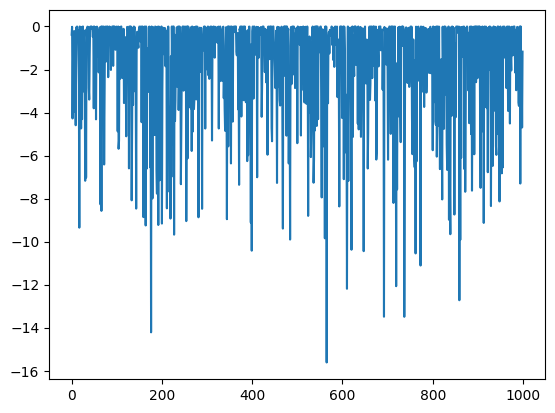

In [41]:
# plot errors
plt.plot(lr.likelihoods[0].ravel())
plt.show()